In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [2]:
epoch = 30

In [3]:
hidden_states = np.load('hidden_state.npy')

In [3]:
hidden_states

array([[ -2.61023119e-02,  -1.17079196e-02,   5.62308589e-03, ...,
         -4.08929249e-04,   2.14719796e-04,  -2.71840334e-01],
       [ -2.61023138e-02,  -1.17079196e-02,   5.62308496e-03, ...,
         -3.96290125e-04,   2.06997851e-03,  -1.60975561e-01],
       [ -2.61023119e-02,  -1.17079215e-02,   5.62308589e-03, ...,
         -5.08714002e-04,   1.03346375e-03,  -2.54966706e-01],
       ..., 
       [  3.18097509e-02,   1.59751829e-02,  -1.17529258e-01, ...,
         -3.99927783e-04,   1.25836171e-02,  -2.88387507e-01],
       [  3.18097472e-02,   1.59751829e-02,  -1.17529258e-01, ...,
         -4.47036145e-05,   4.63831209e-04,  -4.32241619e-01],
       [  3.18097435e-02,   1.59751885e-02,  -1.17529273e-01, ...,
         -6.33807940e-05,   1.92168821e-03,  -3.75503182e-01]], dtype=float32)

In [4]:
model = TSNE(n_components=2, random_state=0)
reshaped = hidden_states[:,:200]
for i in range(hidden_states.shape[1]/ 200):
    if i == 0: continue
    next = hidden_states[:,i*200:(i+1)*200]
    reshaped = np.concatenate((reshaped,next))
print reshaped.shape
print hidden_states.shape

(93120, 200)
(3104, 6000)


In [7]:
def PCA_plot(reshaped):
    
    model = PCA(n_components=2)
    transformed = model.fit_transform(reshaped)
    for i in range(epoch):
        subTran = transformed[i*3104:(i+1)*3104,:]
        x = subTran[:, 0]
        y = subTran[:, 1]

        c = range(3104)

        plt.figure()
        plt.scatter(x,y,c=c, alpha=0.1)
        plt.show()
# PCA_plot(reshaped)


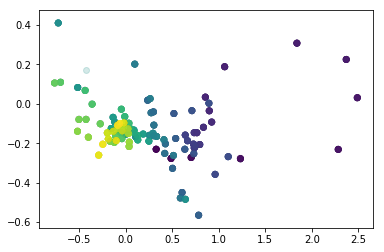

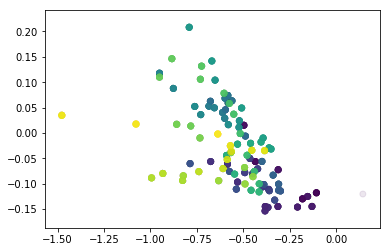

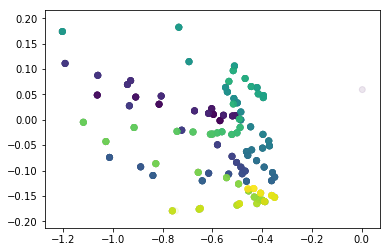

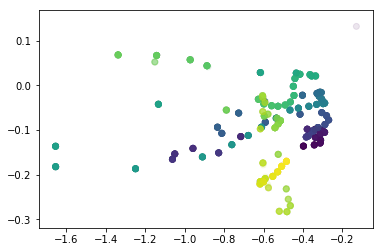

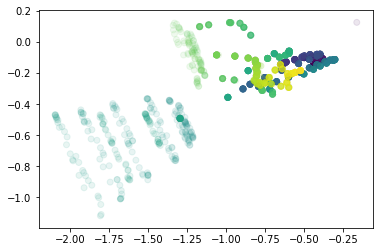

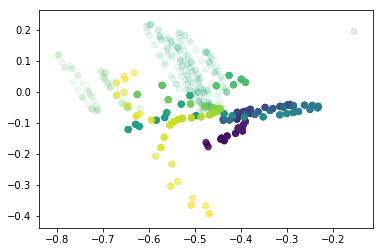

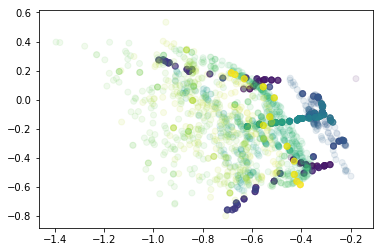

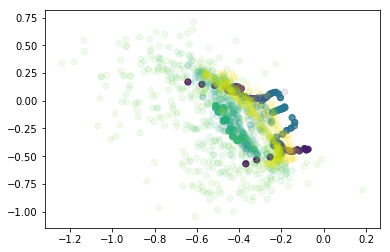

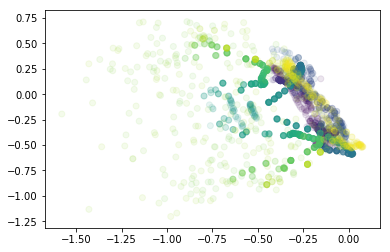

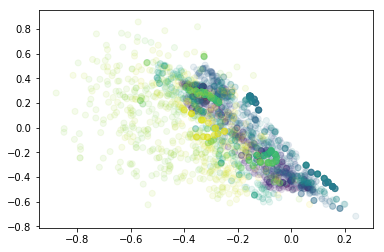

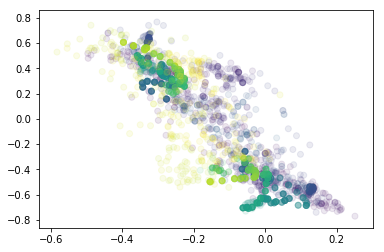

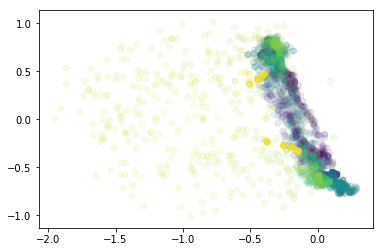

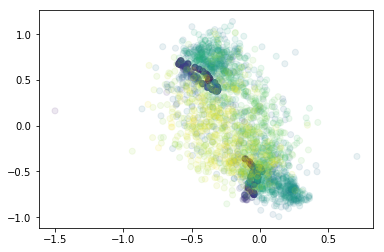

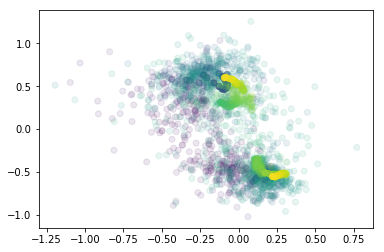

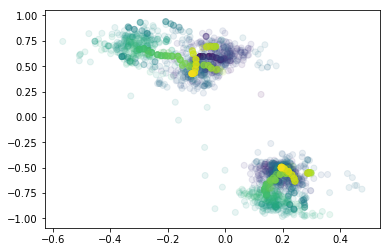

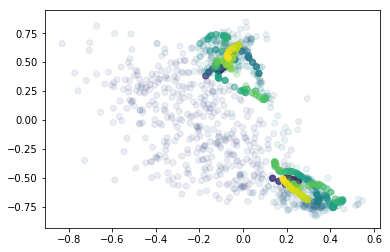

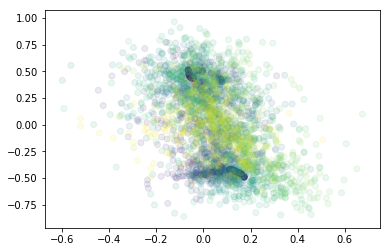

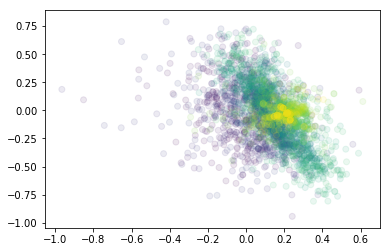

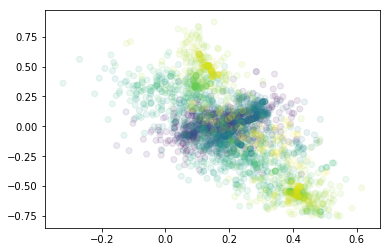

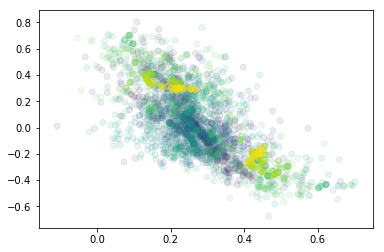

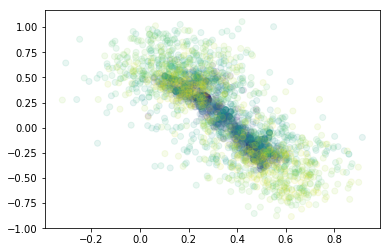

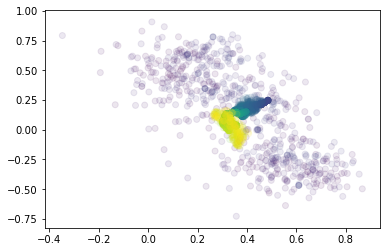

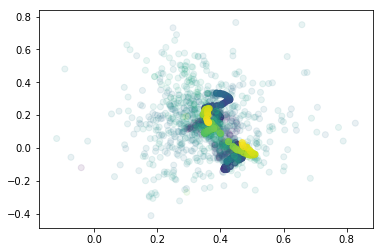

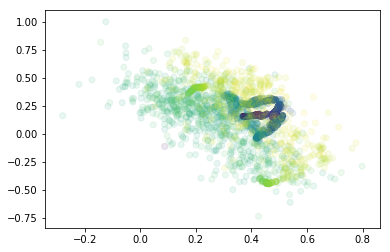

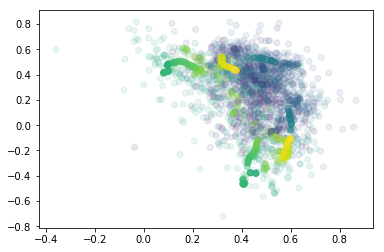

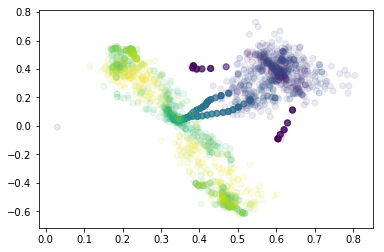

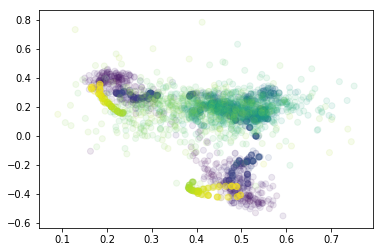

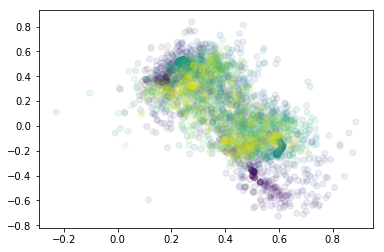

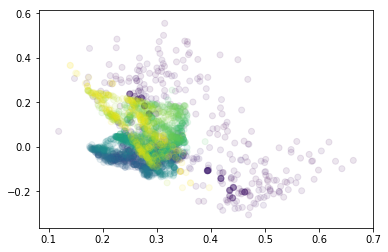

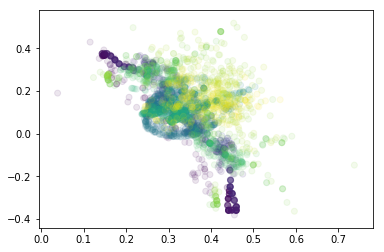

In [8]:
PCA_plot(reshaped)

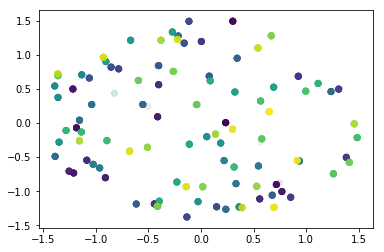

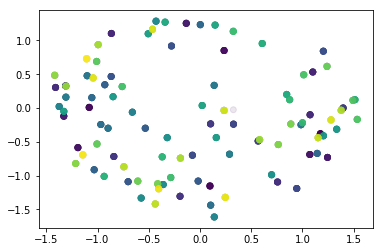

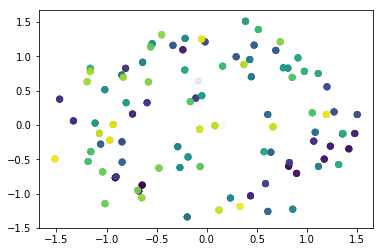

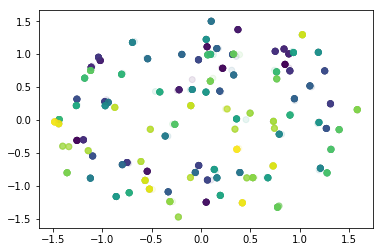

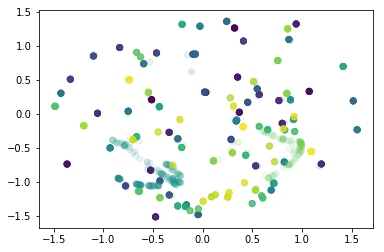

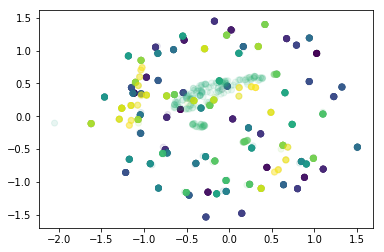

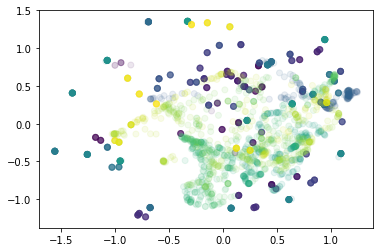

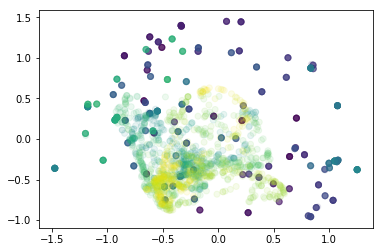

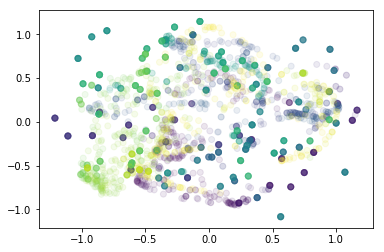

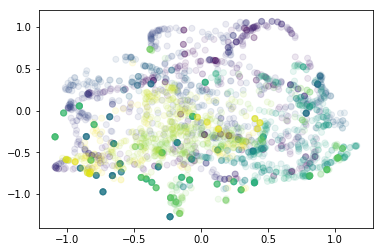

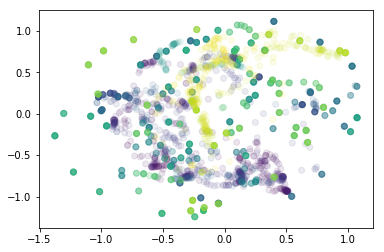

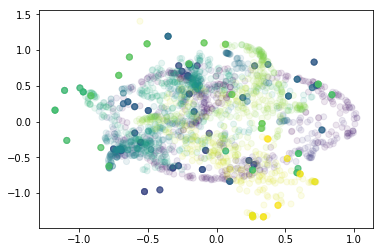

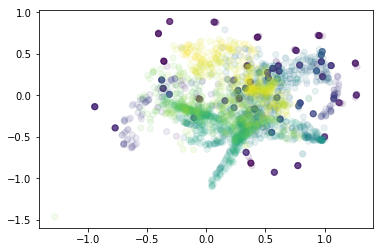

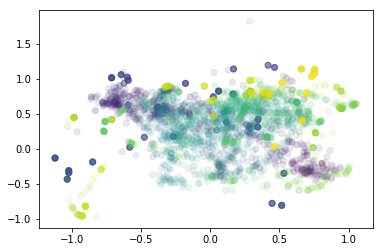

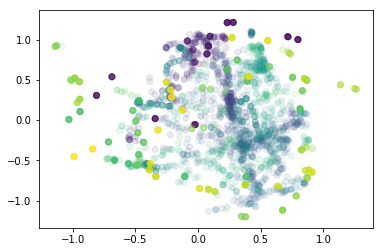

In [5]:
def TSNE_plot(reshaped):
    model = TSNE(n_components=2, random_state=0)
    half_reshaped = reshaped[:reshaped.shape[0]/2,:]
    transformed = model.fit_transform(half_reshaped)
    for i in range(hidden_states.shape[1]/ 200 / 2):
        subTran = transformed[i*3104:(i+1)*3104,:]
        x = subTran[:, 0]
        y = subTran[:, 1]

        c = range(3104)

        plt.figure() 
        plt.scatter(x,y,c=c, alpha=0.1)
        plt.show()

TSNE_plot(reshaped)

In [2]:
hidden_states3 = np.load('hidden_stateb3.npy')


In [4]:
hidden_states3.shape

(3104, 18000)

In [18]:
hidden_states = []
hidden_states.append(hidden_states3[:,:6000])
hidden_states.append(hidden_states3[:,6000:12000])
hidden_states.append(hidden_states3[:,12000:18000])
hidden_states[1].shape

(3104, 6000)

In [19]:
reshaped = [0,0,0]
reshaped[0]= hidden_states[0][:,:200]
reshaped[1]= hidden_states[1][:,:200]
reshaped[2]= hidden_states[2][:,:200]
for j in range(3):
    for i in range(hidden_states[0].shape[1]/ 200):
        if i == 0: continue
        next = hidden_states[j][:,i*200:(i+1)*200]
        reshaped[j] = np.concatenate((reshaped[j],next))

In [20]:
print reshaped[0].shape
print reshaped[1].shape
print reshaped[2].shape

(93120, 200)
(93120, 200)
(93120, 200)


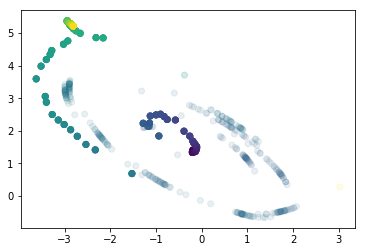

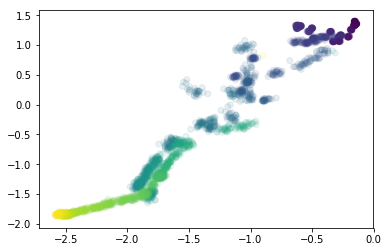

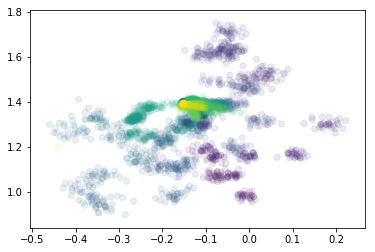

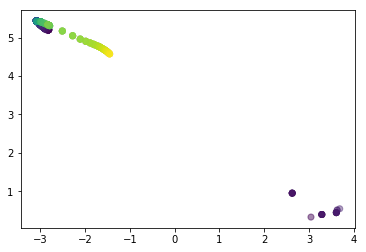

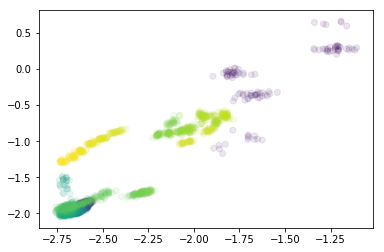

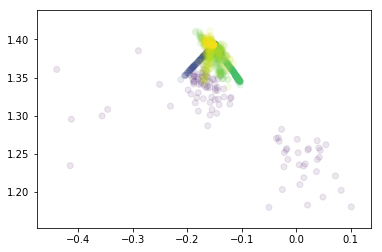

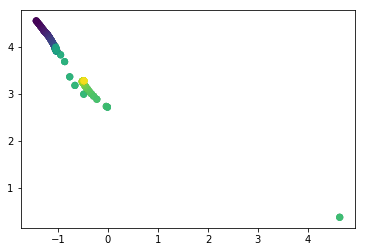

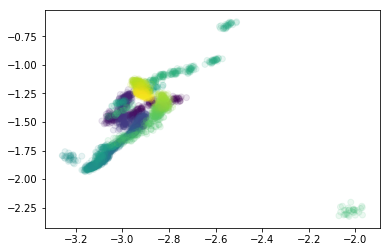

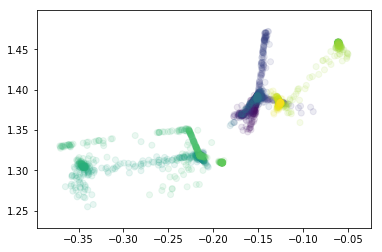

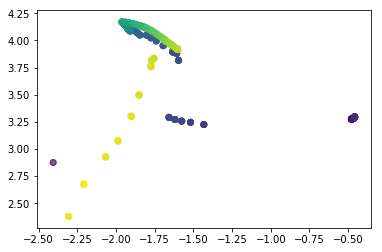

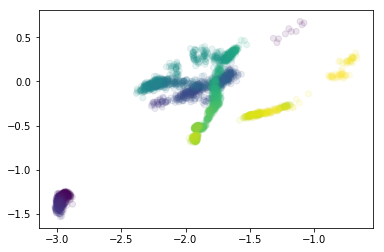

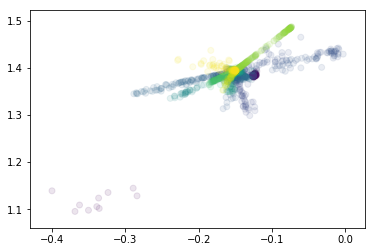

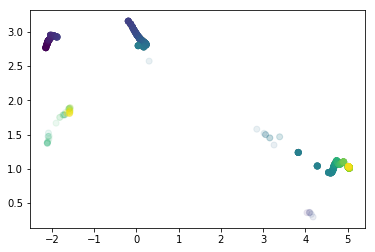

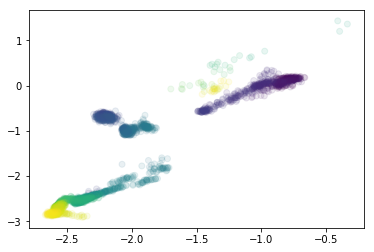

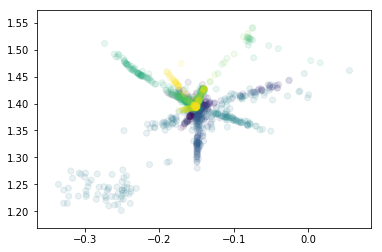

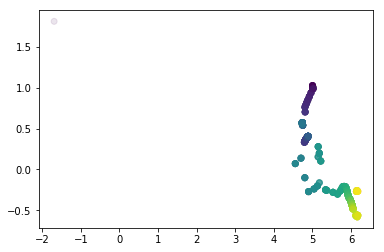

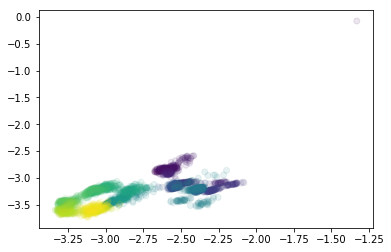

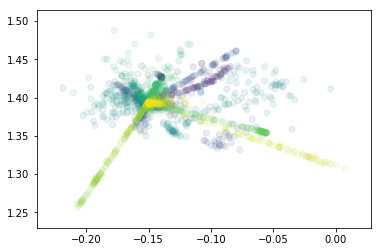

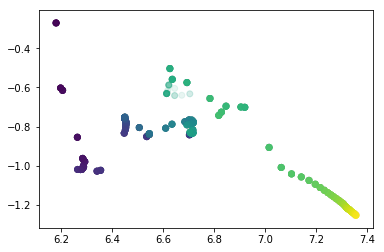

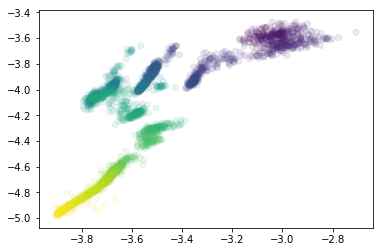

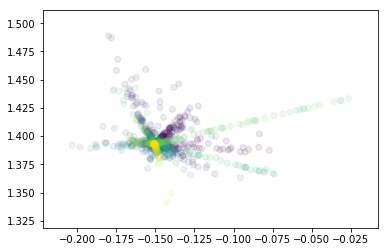

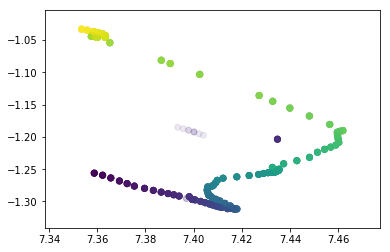

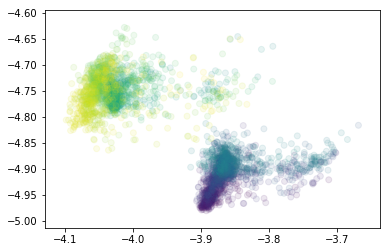

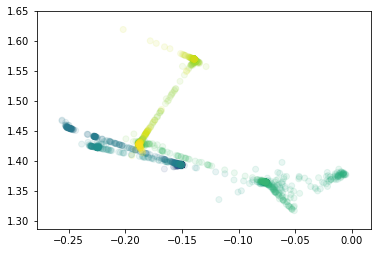

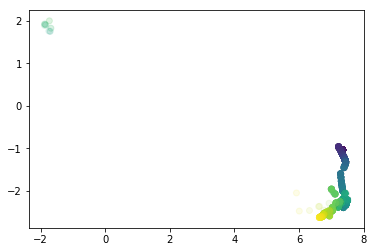

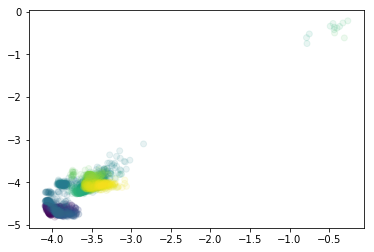

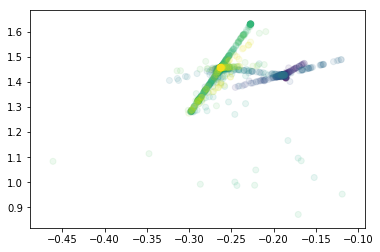

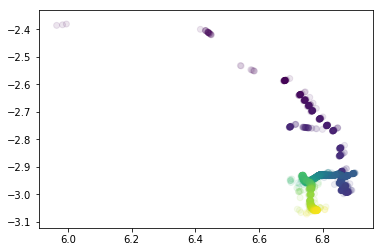

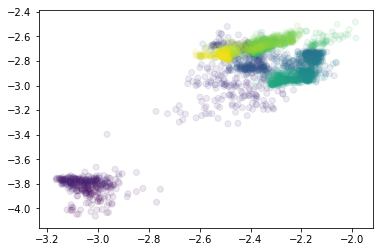

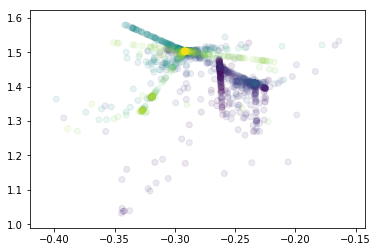

In [30]:
#plot first layer
PCA_plot(reshaped[0])

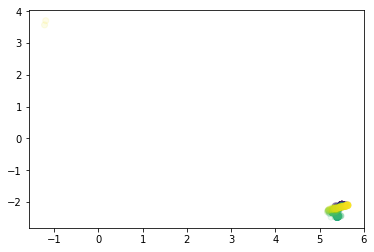

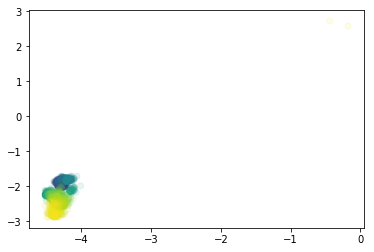

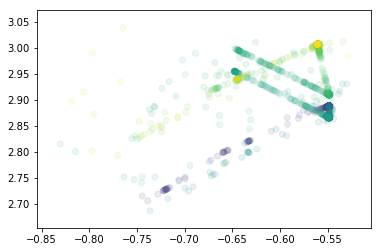

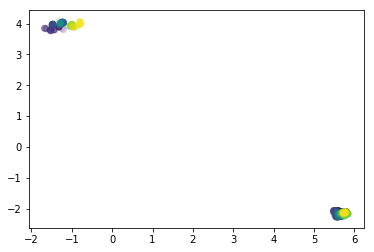

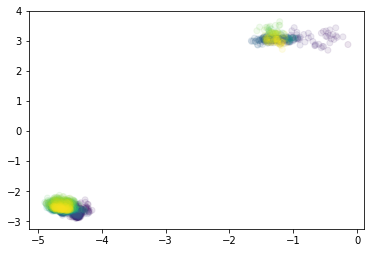

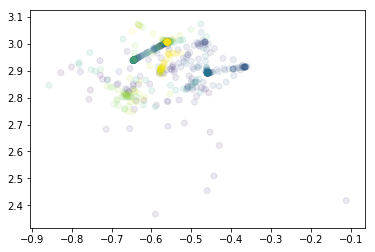

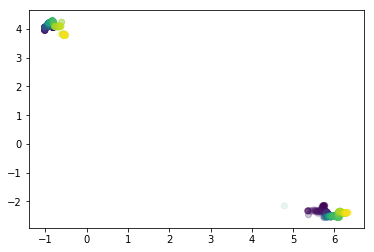

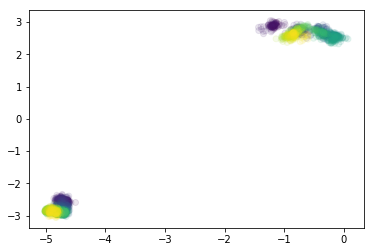

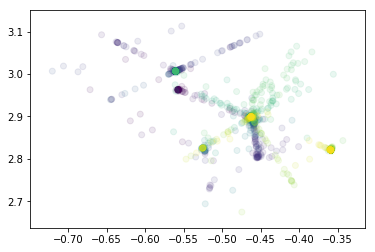

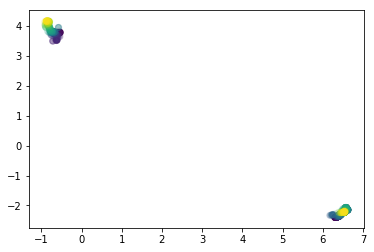

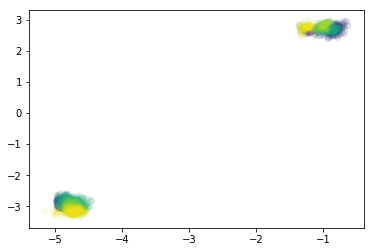

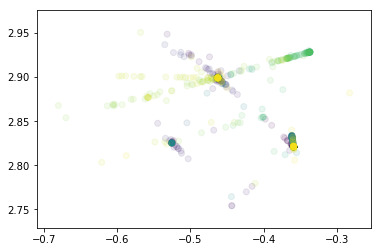

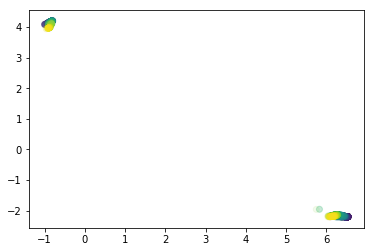

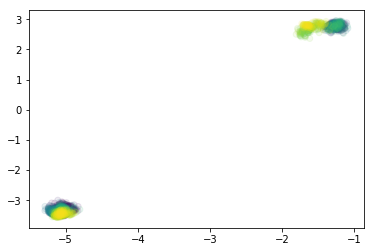

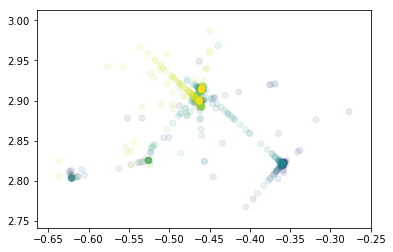

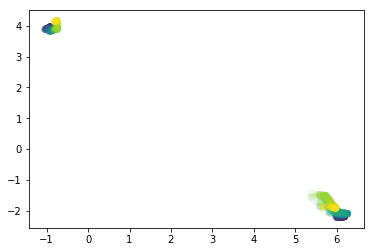

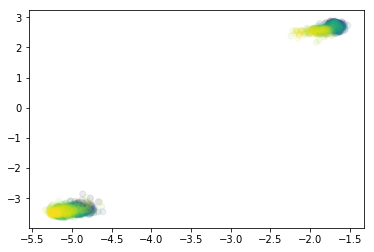

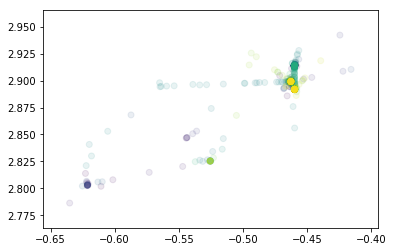

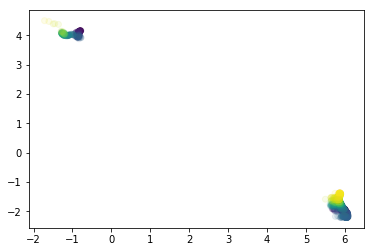

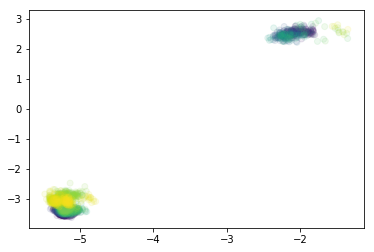

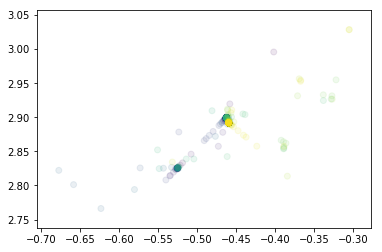

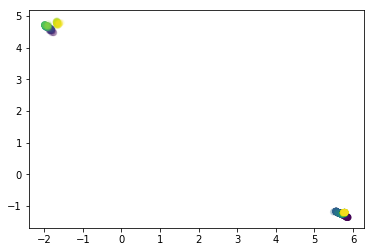

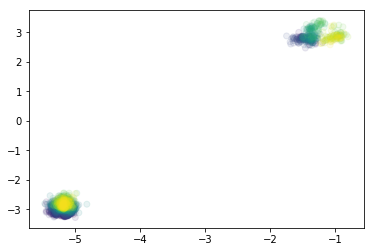

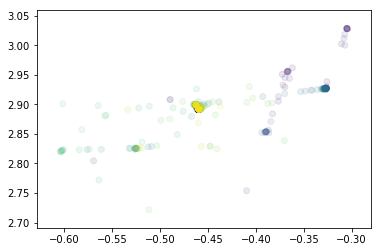

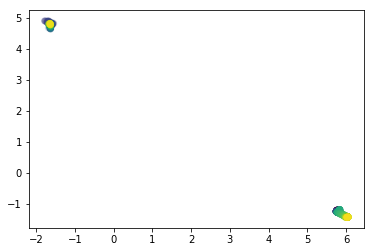

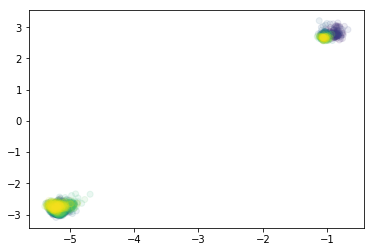

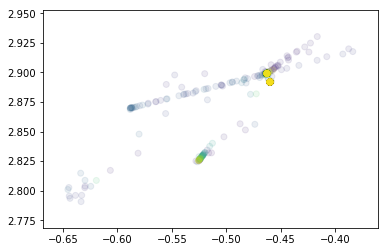

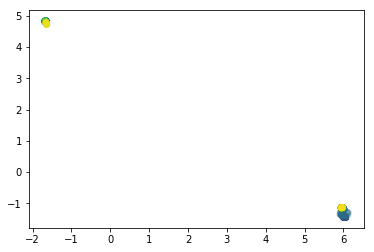

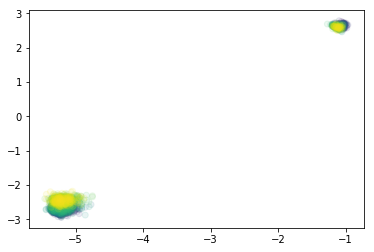

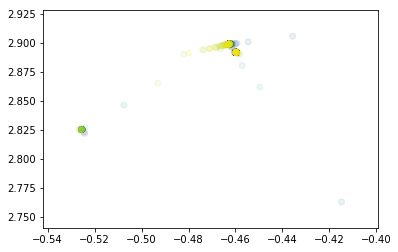

In [31]:
#plot second layer
PCA_plot(reshaped[1])

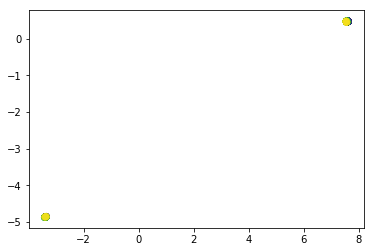

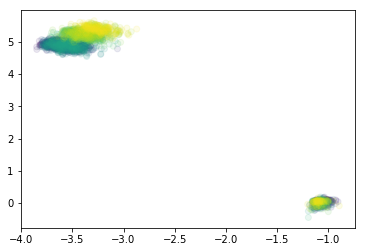

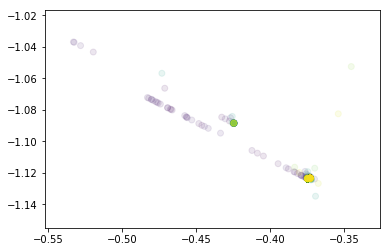

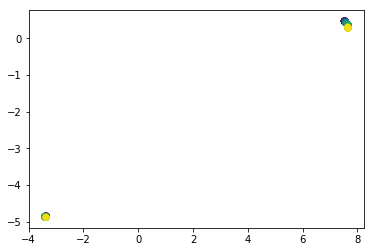

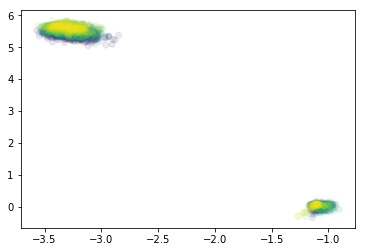

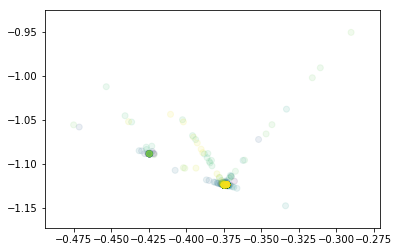

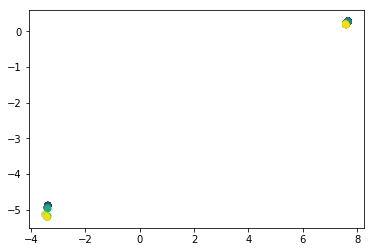

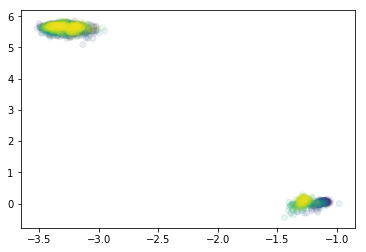

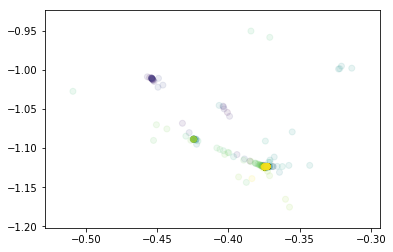

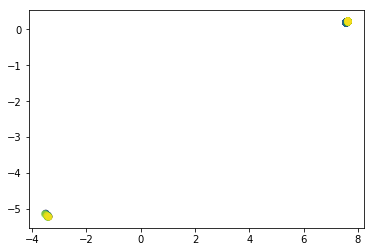

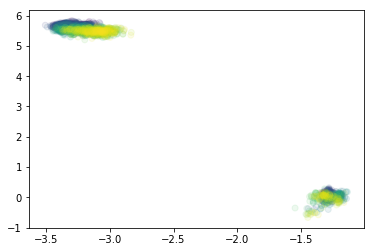

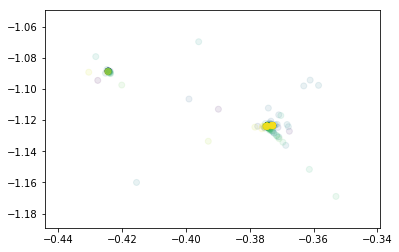

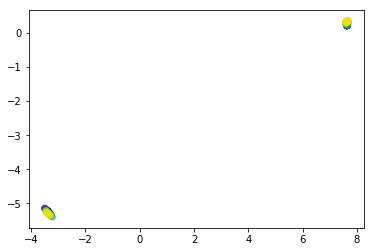

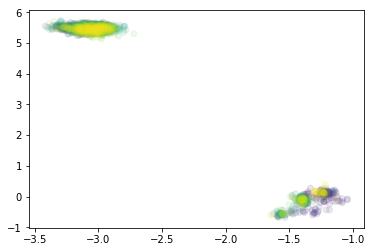

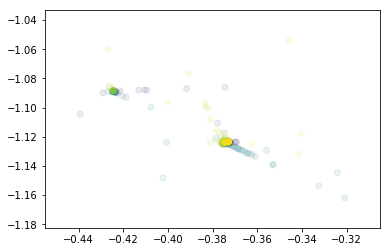

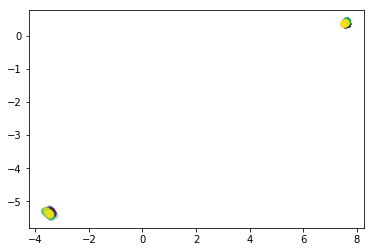

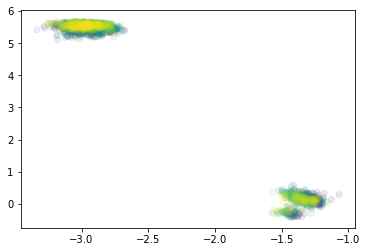

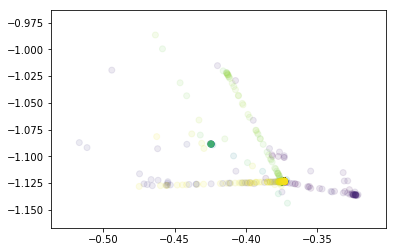

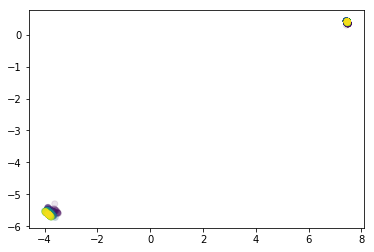

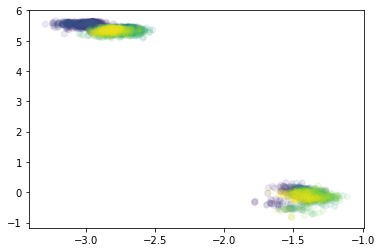

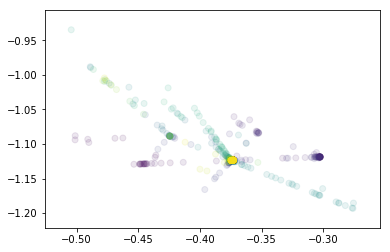

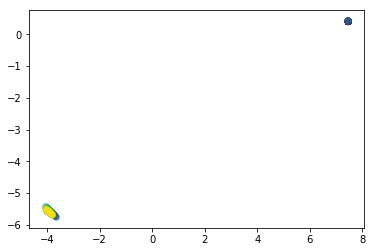

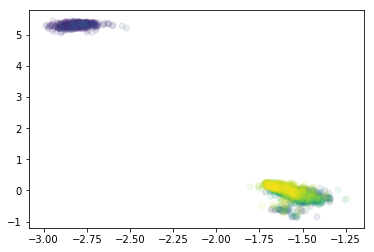

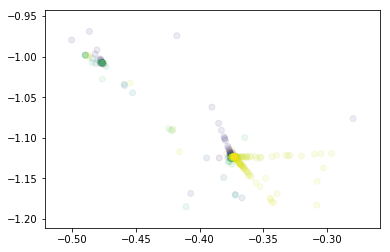

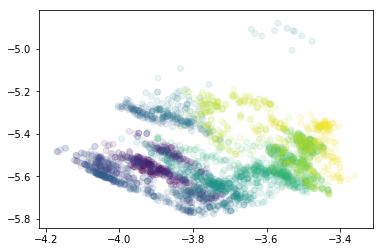

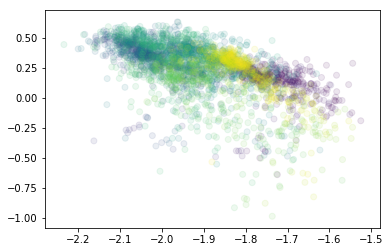

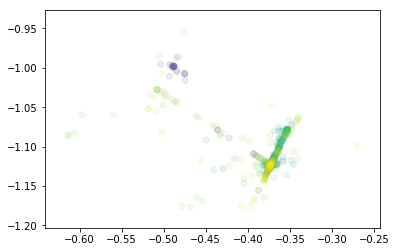

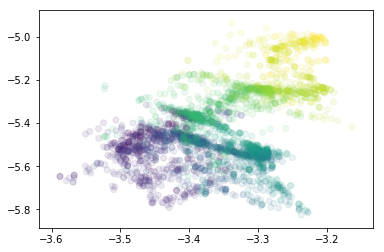

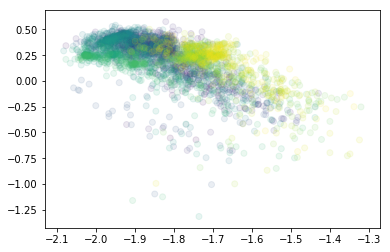

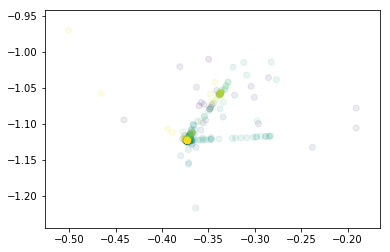

In [32]:
#plot third layer
PCA_plot(reshaped[2])